In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte


In [6]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [7]:
%%cython
def hello():
    print("Hello, World!")

In [8]:
hello()

Hello, World!


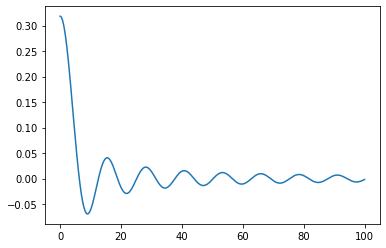

In [9]:
dt=1
t0=0
A=1
def b(o):
    return A/(np.pi*(o))*(np.sin(o*(t0+dt/2))-np.sin(o*(t0-dt/2)))
o=np.linspace(0.0001,100,1000)
B=b(o)
plt.plot(o,B)
plt.savefig("b(o).pdf",dpi=300)

<ipython-input-10-e3a1139aa922>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return inte.quad(lambda x: b(x)*np.cos(t*x),0,np.inf,limit=50)
<ipython-input-10-e3a1139aa922>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return inte.quad(lambda x: b(x)*np.cos(t*x),0,np.inf,limit=50)


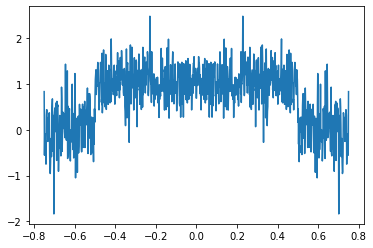

In [10]:
def f(t):
    return inte.quad(lambda x: b(x)*np.cos(t*x),0,np.inf,limit=50)
t=np.linspace(-dt*0.75,dt*0.75,1000)
y=[f(t)[0] for t in t]
plt.plot(t,y)

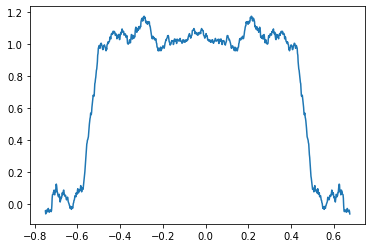

In [11]:
sm=50
plt.plot(t[:-sm],[np.mean(y[i:i+sm]) for i in range(len(y)-sm)])
plt.savefig("avg.pdf")